In [2]:
import math
import torch
import gpytorch
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


import GPE_ensemble as GPE

import os
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
#from GPErks.gp.data.dataset import Dataset
from gpytorch.likelihoods import GaussianLikelihood
from gpytorch.means import LinearMean
from gpytorch.kernels import RBFKernel, ScaleKernel
from torchmetrics import MeanSquaredError, R2Score
#from GPErks.gp.experiment import GPExperiment
#from GPErks.train.emulator import GPEmulator
#from GPErks.perks.inference import Inference
#from GPErks.train.early_stop import NoEarlyStoppingCriterion
#from GPErks.train.early_stop import (
#    GLEarlyStoppingCriterion,
#    PQEarlyStoppingCriterion,
#    UPEarlyStoppingCriterion,
#)
#from GPErks.train.early_stop import PkEarlyStoppingCriterion



%matplotlib inline
%load_ext autoreload
%autoreload 2

# set logger and enforce reproducibility
#from GPErks.log.logger import get_logger
#from GPErks.utils.random import set_seed
#log = get_logger()
seed = 7
#set_seed(seed)


In [3]:
import pickle

In [4]:
dat=pickle.load(open('LAT3_Case_1_20nodes.pkl','rb'))

In [5]:
dat

{'input': {'data': array([[2.80000000e-01, 4.14891647e-01, 2.04070000e+02, 9.24516544e+01,
          5.85540044e+01],
         [2.90000000e-01, 1.43179826e-01, 1.99310000e+02, 1.96483974e+02,
          5.37683409e+01],
         [2.80000000e-01, 1.88311252e-01, 7.30500000e+01, 1.77251009e+02,
          5.98092205e+01],
         ...,
         [4.00000000e-02, 2.56282936e-02, 1.26830000e+02, 4.87612881e+02,
          1.06583301e+02],
         [2.30000000e-01, 5.89543296e-02, 1.93810000e+02, 4.17514731e+02,
          6.02603049e+01],
         [2.10000000e-01, 5.78799405e-02, 1.61840000e+02, 4.17577285e+02,
          7.28207192e+01]]),
  'labels': ['tau_in', 'tau_out', 'tau_open', 'tau_close', 'conductivity']},
 'output': {2369: array([[ 65.35510254],
         [ 71.39916992],
         [ 62.02490234],
         [ 61.65112305],
         [ 61.02416992],
         [ 76.34423828],
         [211.12341309],
         [ 69.94628906],
         [ 51.43896484],
         [169.43493652],
         [ 50.6551

In [6]:
dat.keys()

dict_keys(['input', 'output'])

In [7]:
x_labels=dat.get('input').get('labels')

In [8]:
X_all=pd.DataFrame(dat.get('input').get('data'))
X_all.columns=x_labels

In [9]:
y_labels=list(dat.get('output').keys())

In [10]:
y_all = np.zeros((X_all.shape[0],len(y_labels)))

In [11]:
for i,k in enumerate(y_labels):
    y_all[:,[i]]=(dat.get('output').get(k))


In [12]:
y_all=pd.DataFrame(y_all)
y_all.columns=y_labels

In [13]:
y_all

,2369,42459,12964,76976,28091,82288,83487,83808,84640,57042,52134,53885,62291,63826,25112,13320,27037,7176,65141,51332
0,65.355103,40.223755,93.558960,47.438354,37.727783,51.185181,63.468262,47.071167,69.296875,12.657959,21.509155,44.467896,102.781250,78.255737,92.841309,96.487061,38.152710,67.596436,68.265259,8.939941
1,71.399170,43.874634,102.234131,51.767944,41.155273,55.858276,69.313721,51.378906,75.707275,13.723145,23.374512,48.496948,112.333130,85.483398,101.473022,105.439941,41.613403,73.834839,74.551392,9.649048
2,62.024902,38.173950,88.789673,45.020996,35.809448,48.572632,60.233765,44.675781,65.770996,12.018311,20.407959,42.194458,97.536255,74.265015,88.116699,91.567871,36.210449,64.151123,64.782959,8.491699
3,61.651123,37.863159,88.235718,44.677002,35.524902,48.198120,59.821655,44.348633,65.354248,11.848877,20.156250,41.839844,96.970947,73.772705,87.601685,91.001343,35.915527,63.736450,64.334839,8.333252
4,61.024170,37.064209,87.216797,43.836304,34.863647,47.296143,58.999268,43.614868,64.599121,11.259644,19.291626,40.872314,96.055420,72.758911,86.722656,89.996948,35.181396,62.898193,63.382446,7.722900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,17.907715,10.821777,25.422729,12.784790,10.228638,13.786865,17.229980,12.751099,18.878296,3.337769,5.625488,11.905273,28.032227,21.190918,25.292114,26.237549,10.290283,18.357910,18.470459,2.302002
198,43.475220,26.773682,62.163086,31.563354,25.126099,34.037476,42.200562,31.327393,46.084839,8.486816,14.339478,29.576294,68.288330,52.005981,61.713623,64.108887,25.401001,44.953613,45.375000,6.023682
199,33.592041,20.159424,47.847778,23.854492,19.108765,25.776855,32.342163,23.845093,35.470947,5.992310,10.276001,22.158936,52.664429,39.812500,47.574829,49.408447,19.189331,34.418579,34.670898,4.018555
200,68.337646,41.980469,97.833496,49.535767,39.386108,53.446045,66.338013,49.173340,72.465332,13.113525,22.335693,46.390259,107.494019,81.800659,97.116089,100.911621,39.817017,70.662842,71.341919,9.205444


In [14]:
#y_all=y_all.loc[:,['LAT_median_1600-2100',
#   'LAT_median_2100-3100','LAT_5_95_1600-2100',
#   'LAT_5_95_2100-3100', 'APD_median_1600-2100',
#   'APD_median_2100-3100','APD_5_95_1600-2100',
#   'APD_5_95_2100-3100']]

In [15]:
#y_all=y_all.loc[:,['LAT_median_1600-2100',
#   'LAT_median_2100-3100','LAT_5_95_1600-2100',
#   'LAT_5_95_2100-3100', 'APD_median_1600-2100','APD_5_95_1600-2100']]

# Emulator

In [16]:
y_all.max()

2369     232.615967
42459    141.786987
12964    340.408813
76976    167.515747
28091    134.779419
82288    182.158813
83487    229.148315
83808    168.406494
84640    252.225342
57042     39.200806
52134     70.531616
53885    155.106079
62291    370.135010
63826    283.722046
25112    338.623413
13320    352.314087
27037    135.424438
7176     243.501099
65141    246.446289
51332     25.982666
dtype: float64

In [17]:
input_masked = X_all.copy()

In [18]:
y_all

,2369,42459,12964,76976,28091,82288,83487,83808,84640,57042,52134,53885,62291,63826,25112,13320,27037,7176,65141,51332
0,65.355103,40.223755,93.558960,47.438354,37.727783,51.185181,63.468262,47.071167,69.296875,12.657959,21.509155,44.467896,102.781250,78.255737,92.841309,96.487061,38.152710,67.596436,68.265259,8.939941
1,71.399170,43.874634,102.234131,51.767944,41.155273,55.858276,69.313721,51.378906,75.707275,13.723145,23.374512,48.496948,112.333130,85.483398,101.473022,105.439941,41.613403,73.834839,74.551392,9.649048
2,62.024902,38.173950,88.789673,45.020996,35.809448,48.572632,60.233765,44.675781,65.770996,12.018311,20.407959,42.194458,97.536255,74.265015,88.116699,91.567871,36.210449,64.151123,64.782959,8.491699
3,61.651123,37.863159,88.235718,44.677002,35.524902,48.198120,59.821655,44.348633,65.354248,11.848877,20.156250,41.839844,96.970947,73.772705,87.601685,91.001343,35.915527,63.736450,64.334839,8.333252
4,61.024170,37.064209,87.216797,43.836304,34.863647,47.296143,58.999268,43.614868,64.599121,11.259644,19.291626,40.872314,96.055420,72.758911,86.722656,89.996948,35.181396,62.898193,63.382446,7.722900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,17.907715,10.821777,25.422729,12.784790,10.228638,13.786865,17.229980,12.751099,18.878296,3.337769,5.625488,11.905273,28.032227,21.190918,25.292114,26.237549,10.290283,18.357910,18.470459,2.302002
198,43.475220,26.773682,62.163086,31.563354,25.126099,34.037476,42.200562,31.327393,46.084839,8.486816,14.339478,29.576294,68.288330,52.005981,61.713623,64.108887,25.401001,44.953613,45.375000,6.023682
199,33.592041,20.159424,47.847778,23.854492,19.108765,25.776855,32.342163,23.845093,35.470947,5.992310,10.276001,22.158936,52.664429,39.812500,47.574829,49.408447,19.189331,34.418579,34.670898,4.018555
200,68.337646,41.980469,97.833496,49.535767,39.386108,53.446045,66.338013,49.173340,72.465332,13.113525,22.335693,46.390259,107.494019,81.800659,97.116089,100.911621,39.817017,70.662842,71.341919,9.205444


In [19]:
y_train = torch.tensor(y_all.values)
x_train = torch.tensor(X_all[0:y_all.shape[0]].values)

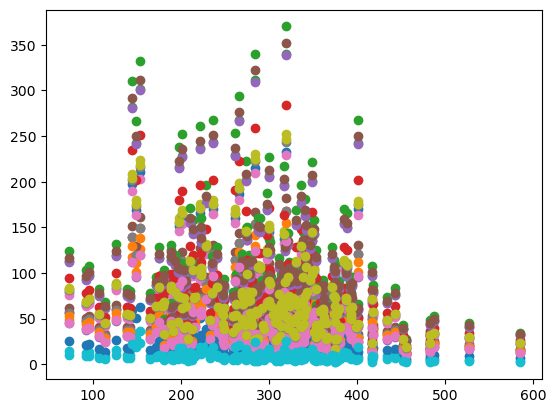

In [20]:
plt.plot(x_train[:,3],y_train,'o')

In [21]:
y_train

tensor([[ 65.3551,  40.2238,  93.5590,  ...,  67.5964,  68.2653,   8.9399],
        [ 71.3992,  43.8746, 102.2341,  ...,  73.8348,  74.5514,   9.6490],
        [ 62.0249,  38.1740,  88.7897,  ...,  64.1511,  64.7830,   8.4917],
        ...,
        [ 33.5920,  20.1594,  47.8478,  ...,  34.4186,  34.6709,   4.0186],
        [ 68.3376,  41.9805,  97.8335,  ...,  70.6628,  71.3419,   9.2054],
        [ 55.0085,  33.8883,  78.7201,  ...,  56.9004,  57.4625,   7.5800]],
       dtype=torch.float64)

In [22]:
x_train.shape

torch.Size([202, 5])

In [23]:
emulator = GPE.ensemble(x_train,y_train,mean_func="linear",training_iter=500)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [24]:
nDim = input_masked.shape[1]
boundsMaxMin = []
for i in range(nDim):
    boundsMaxMin.append([np.min(input_masked.iloc[:,i]),np.max(input_masked.iloc[:,i])])
    print(boundsMaxMin[i])

[0.01, 0.3]
[0.011689924746109448, 0.5380393844829442]
[65.25, 214.76]
[72.92223667400063, 584.7709199341429]
[14.142135623730951, 217.2556098240043]


In [25]:
##### from SALib.sample import saltelli
from SALib.sample import saltelli
from SALib.analyze import sobol
from SALib.test_functions import Ishigami
import numpy as np

# Define the model inputs
problem = {
    'num_vars': nDim,
    'names': x_labels,
    'bounds': boundsMaxMin
    #'bounds': [[-1, 1],
     #          [-1, 1],
      #         [-1, 1],
       #        [-1, 1],
        #       [-1, 1],
         #      [-1, 1],
          #     [-1, 1],
           #    [-1, 1],
            #   [-1,1]]
}

# Generate samples
param_values = saltelli.sample(problem, 1024)

data1 = torch.tensor(param_values)
#data1.columns = X_train.columns

Ymean=emulator.predict(data1)

/var/folders/_j/ptyc01811q5b1dg30hshtfzh0000gr/T/ipykernel_47591/2553582652.py:24: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5. Please use `salib.sample.sobol`
  param_values = saltelli.sample(problem, 1024)


In [26]:
data1.shape

torch.Size([12288, 5])

In [27]:
Si = []
nMod = y_all.shape[1]
nDim = input_masked.shape[1]
for i in range(nMod):
    Si.append(sobol.analyze(problem, Ymean[:,i].detach().numpy(), print_to_console=True,calc_second_order=True))

                    ST   ST_conf
tau_in        0.005246  0.000767
tau_out       0.000809  0.000165
tau_open      0.001840  0.000351
tau_close     0.010415  0.001819
conductivity  0.991151  0.058288
                    S1   S1_conf
tau_in        0.004277  0.006331
tau_out       0.000189  0.002510
tau_open      0.001655  0.003650
tau_close     0.008728  0.009447
conductivity  0.984068  0.126196
                                 S2   S2_conf
(tau_in, tau_out)         -0.000279  0.009417
(tau_in, tau_open)        -0.000364  0.009413
(tau_in, tau_close)       -0.000203  0.009725
(tau_in, conductivity)     0.000419  0.017971
(tau_out, tau_open)       -0.000632  0.003829
(tau_out, tau_close)      -0.000490  0.003841
(tau_out, conductivity)    0.000834  0.004614
(tau_open, tau_close)      0.001081  0.004920
(tau_open, conductivity)   0.000157  0.010465
(tau_close, conductivity)  0.000105  0.026363
                    ST   ST_conf
tau_in        0.006807  0.000927
tau_out       0.001106  0.000222

                    ST   ST_conf
tau_in        0.006273  0.000906
tau_out       0.001323  0.000219
tau_open      0.001703  0.000331
tau_close     0.014743  0.002631
conductivity  0.988531  0.054498
                    S1   S1_conf
tau_in        0.005500  0.007830
tau_out       0.000214  0.002769
tau_open      0.001592  0.003318
tau_close     0.012022  0.011296
conductivity  0.980257  0.113683
                                 S2   S2_conf
(tau_in, tau_out)         -0.000058  0.011220
(tau_in, tau_open)        -0.000119  0.011296
(tau_in, tau_close)        0.000093  0.011317
(tau_in, conductivity)     0.000015  0.017952
(tau_out, tau_open)       -0.000437  0.004140
(tau_out, tau_close)      -0.000261  0.004145
(tau_out, conductivity)    0.001352  0.005539
(tau_open, tau_close)      0.001177  0.005072
(tau_open, conductivity)  -0.000130  0.008250
(tau_close, conductivity)  0.000915  0.027774
                    ST   ST_conf
tau_in        0.005299  0.000725
tau_out       0.000537  0.000142

In [28]:
Si_first=np.zeros((nDim,nMod))
Si_total=np.zeros((nDim,nMod))
for i in range(nMod):
    total_Si, first_Si, second_Si = Si[i].to_df()
    Si_first[:,i] =  first_Si.iloc[:,0]
    Si_total[:,i] =  total_Si.iloc[:,0]


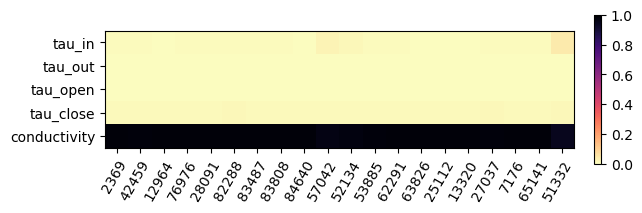

In [29]:
inputs = X_all.columns.tolist()
outputs = y_all.columns.tolist()
fig, ax = plt.subplots()
im = ax.imshow(Si_first[0:28],cmap='magma_r',vmin=0,vmax=1)

ax.set_xticks(np.arange(len(outputs)),labels=outputs)
ax.set_yticks(np.arange(len(inputs)), labels=inputs)
plt.setp(ax.get_xticklabels(), rotation=60, ha="right",
         rotation_mode="anchor");

plt.colorbar(im,fraction=0.015, pad=0.04)

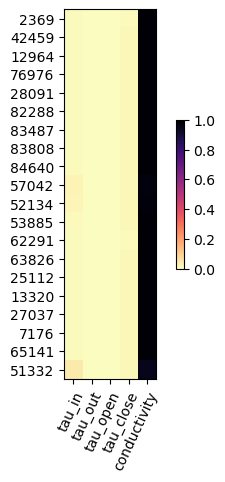

In [30]:
inputs = X_all.columns.tolist()
outputs = y_all.columns.tolist()
fig, ax = plt.subplots()
im = ax.imshow(Si_total.T[0:28],cmap='magma_r',vmin=0,vmax=1)

ax.set_yticks(np.arange(len(outputs)),labels=outputs)
ax.set_xticks(np.arange(len(inputs)), labels=inputs)
plt.setp(ax.get_xticklabels(), rotation=65, ha="right",
         rotation_mode="anchor");

plt.colorbar(im,fraction=0.015, pad=0.04)

In [31]:
centre = (np.array(boundsMaxMin)[:,1]+np.array(boundsMaxMin)[:,0])/2

In [32]:
boundsMaxMin

[[0.01, 0.3],
 [0.011689924746109448, 0.5380393844829442],
 [65.25, 214.76],
 [72.92223667400063, 584.7709199341429],
 [14.142135623730951, 217.2556098240043]]

In [33]:
centre[[1,2,4,]]

array([  0.27486465, 140.005     , 115.69887272])

In [34]:
boundsMaxMin=np.array(boundsMaxMin)

In [35]:
def log_prior(theta):
    
    #if (np.array(boundsMaxMin)[:,0]<theta).all() and (theta<np.array(boundsMaxMin)[:,1]).all():
        
    if (np.array(boundsMaxMin)[:,0]<theta).all() and (theta<np.array(boundsMaxMin)[:,1]).all():
        return 0.0
    return -np.inf

In [36]:
def log_likelihood(x,emulator,y_val,obs_error):
    x=torch.tensor(x)[None]
    ll =np.sum((emulator.ensemble_log_likelihood_obs_error(x,y_val[None,:],obs_error)).detach().numpy())
    return ll

In [37]:
def log_prob(theta, emulator,y_val,obs_error):
    
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf

    return lp + log_likelihood(theta,emulator, y_val,obs_error)

In [38]:
X=torch.tensor(X_all.values)
y=torch.tensor(y_all.values)[:,0:20]
x_train, x_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.1
)

In [39]:
emulator = GPE.ensemble(x_train,y_train,mean_func="linear",training_iter=500)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [40]:
x_test.shape

torch.Size([21, 5])

In [41]:
y_test.shape

torch.Size([21, 20])

In [42]:
emulator.R2(x_test,y_test)

tensor([0.9997, 0.9999, 0.9994, 0.9999, 0.9999, 0.9999, 0.9990, 0.9998, 0.9999,
        0.9997, 0.9998, 0.9999, 0.9999, 0.9999, 0.9998, 0.9999, 0.9999, 0.9999,
        0.9999, 0.9998], dtype=torch.float64, grad_fn=<RsubBackward1>)

In [43]:
emulator.MSE(x_test,y_test)

tensor([0.3768, 0.0497, 1.9221, 0.0627, 0.0533, 0.1170, 1.3951, 0.1314, 0.1402,
        0.0119, 0.0306, 0.0669, 0.4869, 0.1862, 0.6276, 0.2961, 0.0411, 0.1255,
        0.1866, 0.0036], dtype=torch.float64, grad_fn=<MeanBackward1>)

In [44]:
y_val = y_test.squeeze()[10]

In [45]:
y_val.shape

torch.Size([20])

In [43]:
import emcee

In [44]:
centre = (np.array(boundsMaxMin)[:,1]+np.array(boundsMaxMin)[:,0])/2
ndim = input_masked.shape[1]
nwalkers = 10
p0 = np.random.uniform(0,1,(nwalkers,ndim))*(np.array(boundsMaxMin)[:,1]-np.array(boundsMaxMin)[:,0])+np.array(boundsMaxMin)[:,0]
#y_val = torch.tensor([80,134])
obs_error=((y_val*0.0005))**2

In [47]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_prob, args=[emulator,y_val,obs_error])

sampler.run_mcmc(p0, 40000,progress=True)

 31%|████████████▌                            | 12298/40000 [59:37<2:05:28,  3.68it/s]Traceback (most recent call last):
  File "/Users/pmzcwl/anaconda3/lib/python3.11/site-packages/emcee/ensemble.py", line 624, in __call__
    return self.f(x, *self.args, **self.kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/var/folders/_j/ptyc01811q5b1dg30hshtfzh0000gr/T/ipykernel_6514/2967620101.py", line 7, in log_prob
    return lp + log_likelihood(theta,emulator, y_val,obs_error)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/var/folders/_j/ptyc01811q5b1dg30hshtfzh0000gr/T/ipykernel_6514/1653620547.py", line 3, in log_likelihood
    ll =np.sum((emulator.ensemble_log_likelihood_obs_error(x,y_val[None,:],obs_error)).detach().numpy())
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/pmzcwl/Documents/GitHub/Calibration/GPE_ensemble.py", line 317, in ensemble_log_likelihood_obs_error
    m = likelihoods[i](

emcee: Exception while calling your likelihood function:
  params: [2.33164661e-01 8.61873734e-02 9.66420392e+01 3.45293203e+02
 6.42591927e+01]
  args: [<GPE_ensemble.ensemble object at 0x29d80f8d0>, tensor([57.5957, 35.4561, 82.4326, 41.8115, 33.2628, 45.1058, 55.9309, 41.4922,
        61.0724, 11.1801, 18.9641, 39.1857, 90.5500, 68.9520, 81.8115, 85.0126,
        33.6338, 59.5686, 60.1517,  7.9070], dtype=torch.float64), tensor([8.2932e-04, 3.1428e-04, 1.6988e-03, 4.3705e-04, 2.7660e-04, 5.0863e-04,
        7.8207e-04, 4.3040e-04, 9.3246e-04, 3.1248e-05, 8.9909e-05, 3.8388e-04,
        2.0498e-03, 1.1886e-03, 1.6733e-03, 1.8068e-03, 2.8281e-04, 8.8710e-04,
        9.0456e-04, 1.5630e-05], dtype=torch.float64)]
  kwargs: {}
  exception:


KeyboardInterrupt: 

In [48]:
flat_samples = sampler.get_chain(discard=1000, thin=10, flat=True)
print(flat_samples.shape)

(11290, 5)


In [49]:
boundsMaxMin

array([[1.00000000e-02, 3.00000000e-01],
       [1.16899247e-02, 5.38039384e-01],
       [6.52500000e+01, 2.14760000e+02],
       [7.29222367e+01, 5.84770920e+02],
       [1.41421356e+01, 2.17255610e+02]])

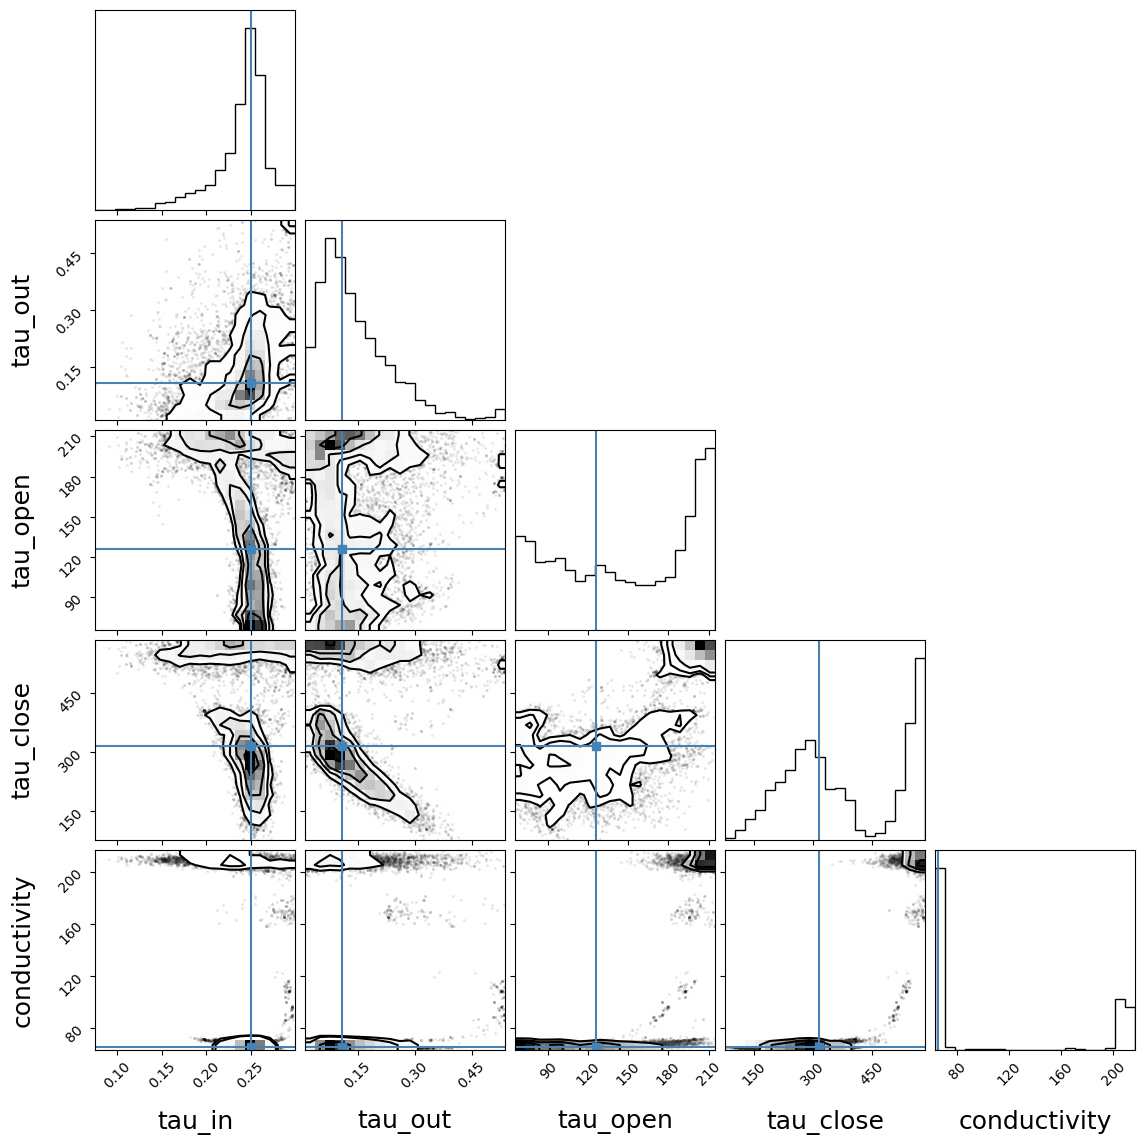

In [50]:
import corner

fig = corner.corner(
    flat_samples, labels=x_labels, label_kwargs=dict(fontsize=18),truths=x_test[10]
);

In [51]:
x_test[10]

tensor([2.5000e-01, 1.0999e-01, 1.2570e+02, 3.1612e+02, 6.5385e+01],
       dtype=torch.float64)

In [52]:
y_val

tensor([57.5957, 35.4561, 82.4326, 41.8115, 33.2628, 45.1058, 55.9309, 41.4922,
        61.0724, 11.1801, 18.9641, 39.1857, 90.5500, 68.9520, 81.8115, 85.0126,
        33.6338, 59.5686, 60.1517,  7.9070], dtype=torch.float64)

(array([2.200e+01, 1.680e+02, 1.633e+03, 2.089e+03, 0.000e+00, 3.000e+00,
        4.900e+01, 6.100e+01, 2.100e+01, 7.244e+03]),
 array([16.46159935, 18.44270897, 20.42381859, 22.40492821, 24.38603783,
        26.36714935, 28.34825897, 30.32936859, 32.31047821, 34.29158783,
        36.27269745]),
 <BarContainer object of 10 artists>)

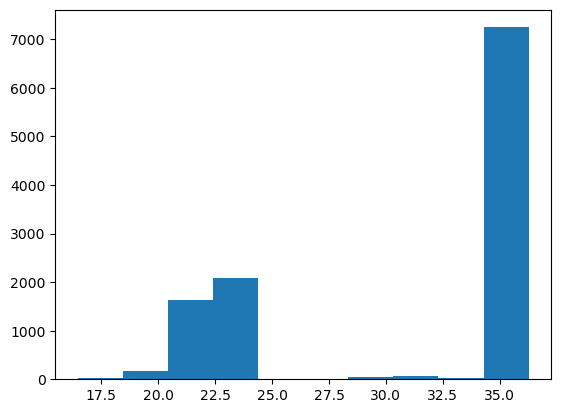

In [53]:
plt.hist(emulator.predict(torch.tensor(flat_samples)).detach().numpy()[:,1])

In [54]:
y_test

tensor([[103.3219,  62.3093, 147.6189,  73.7988,  58.7218,  79.6831,  99.7202,
          73.5350, 109.2872,  18.5063,  31.9584,  68.6575, 162.7303, 122.9568,
         146.8092, 152.3839,  59.1702, 106.2611, 107.0535,  12.4312],
        [ 73.4598,  44.5486, 105.0087,  52.7084,  41.9122,  56.8811,  71.0043,
          52.4550,  77.7578,  13.4487,  23.1063,  49.1228, 115.6740,  87.5718,
         104.4143, 108.3656,  42.2858,  75.6901,  76.2747,   9.1736],
        [ 39.7675,  24.5560,  56.8491,  28.9277,  23.0435,  31.1927,  38.6267,
          28.7000,  42.1569,   7.8639,  13.2324,  27.1322,  62.4263,  47.5852,
          56.4166,  58.6200,  23.3011,  41.1332,  41.5337,   5.6228],
        [ 30.1438,  18.1666,  42.8779,  21.4874,  17.1658,  23.1874,  29.0172,
          21.4340,  31.8031,   5.5018,   9.3651,  19.9928,  47.2808,  35.7158,
          42.6522,  44.2599,  17.2699,  30.9128,  31.1149,   3.7415],
        [ 33.5920,  20.1594,  47.8478,  23.8545,  19.1088,  25.7769,  32.3422,
         

In [55]:
y_val

tensor([57.5957, 35.4561, 82.4326, 41.8115, 33.2628, 45.1058, 55.9309, 41.4922,
        61.0724, 11.1801, 18.9641, 39.1857, 90.5500, 68.9520, 81.8115, 85.0126,
        33.6338, 59.5686, 60.1517,  7.9070], dtype=torch.float64)

In [56]:
emulator.predict(torch.tensor(flat_samples)).mean(axis=0)

tensor([49.7433, 30.8626, 71.1215, 36.6494, 29.2429, 39.5776, 48.9315, 36.3597,
        53.2619, 10.1128, 16.6685, 34.5077, 79.1063, 60.3888, 70.3778, 74.2330,
        29.2892, 52.1278, 52.6349,  7.2421], grad_fn=<MeanBackward1>)

In [57]:
emulator.predict(torch.tensor(flat_samples)).std(axis=0)

tensor([10.7842,  6.2275, 15.3405,  7.0242,  5.4621,  7.5240,  9.4742,  6.9382,
        10.6163,  1.4742,  3.1450,  6.3719, 15.4837, 11.6269, 15.5437, 14.7036,
         5.8968, 10.1058, 10.2255,  0.9314], grad_fn=<StdBackward0>)

In [58]:
y_val*0.05

tensor([2.8798, 1.7728, 4.1216, 2.0906, 1.6631, 2.2553, 2.7965, 2.0746, 3.0536,
        0.5590, 0.9482, 1.9593, 4.5275, 3.4476, 4.0906, 4.2506, 1.6817, 2.9784,
        3.0076, 0.3953], dtype=torch.float64)

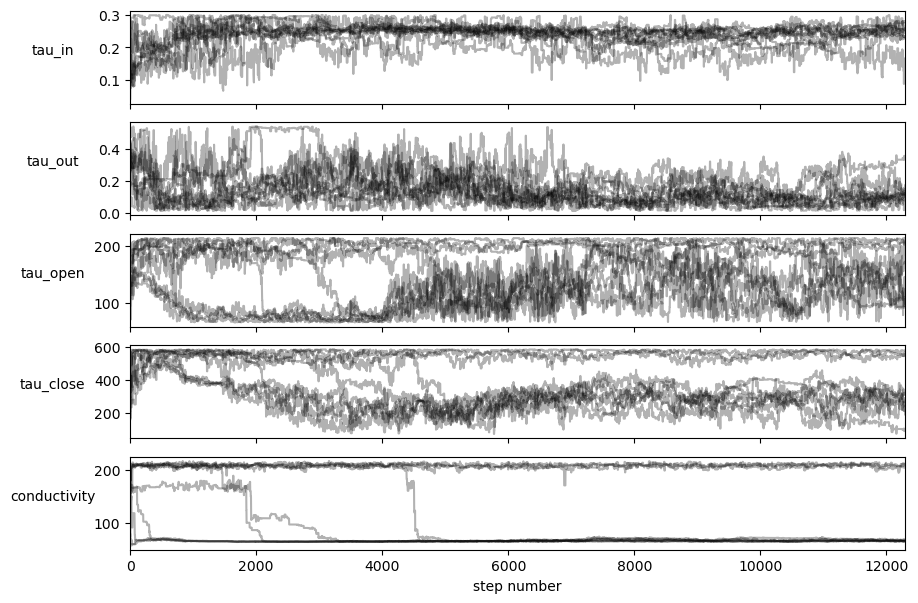

In [59]:
fig, axes = plt.subplots(ndim, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = x_labels
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i],rotation=0)
    ax.yaxis.set_label_coords(-0.1, 0.5)


axes[-1].set_xlabel("step number");

In [62]:
y_all.min()

2369     15.925903
42459     9.595581
12964    22.632446
76976    11.336182
28091     9.097046
82288    12.239258
83487    15.326904
83808    11.328735
84640    16.802612
57042     2.923828
52134     4.948120
53885    10.542480
62291    24.908691
63826    18.850098
25112    22.507568
13320    23.364746
27037     9.136963
7176     16.315063
65141    16.426392
51332     2.000000
dtype: float64

In [63]:
flat_samples.mean(axis=0)-flat_samples.std(axis=0)

array([2.63813142e-01, 5.08043872e-02, 1.05290679e+02, 2.38202872e+02,
       6.49440484e+01])

In [64]:
flat_samples.mean(axis=0)+flat_samples.std(axis=0)

array([2.89689824e-01, 1.45193066e-01, 1.64398634e+02, 3.45195604e+02,
       6.79753826e+01])

In [65]:
boundsMaxMin

array([[1.00000000e-02, 3.00000000e-01],
       [1.16899247e-02, 5.38039384e-01],
       [6.52500000e+01, 2.14760000e+02],
       [7.29222367e+01, 5.84770920e+02],
       [1.41421356e+01, 2.17255610e+02]])

In [66]:
emulator.predict(torch.tensor(flat_samples.mean(axis=0))[None])

tensor([[57.3600, 35.4192, 82.0425, 41.7223, 33.2285, 45.0226, 55.7376, 41.3846,
         60.8054, 11.3097, 19.1001, 39.1560, 90.0569, 68.6785, 81.3581, 84.6232,
         33.6147, 59.3235, 59.9631,  8.0583]], grad_fn=<PermuteBackward0>)

In [67]:
torch.tensor(flat_samples.mean(axis=0))[None]

tensor([[2.7675e-01, 9.7999e-02, 1.3484e+02, 2.9170e+02, 6.6460e+01]],
       dtype=torch.float64)

In [46]:
nDim = x_train.shape[1]
boundsMaxMin = []
for i in range(nDim):
    boundsMaxMin.append([torch.min(x_train[:,i]),torch.max(x_train[:,i])])
    print(boundsMaxMin[i])

centre = (np.array(boundsMaxMin)[:,1]+np.array(boundsMaxMin)[:,0])/2

prior_covar = 0.1*torch.eye(x_train.shape[1]) #prior covariance and mean
prior_covar =torch.eye(x_train.shape[1])*((np.array(boundsMaxMin)[:,1]-np.array(boundsMaxMin)[:,0])/3)**2
prior_mean=torch.tensor(centre)
obs_error = 0.001*torch.ones(20)

[tensor(0.0100, dtype=torch.float64), tensor(0.3000, dtype=torch.float64)]
[tensor(0.0117, dtype=torch.float64), tensor(0.5380, dtype=torch.float64)]
[tensor(65.2500, dtype=torch.float64), tensor(214.7600, dtype=torch.float64)]
[tensor(72.9222, dtype=torch.float64), tensor(584.7709, dtype=torch.float64)]
[tensor(14.1421, dtype=torch.float64), tensor(217.2556, dtype=torch.float64)]


In [47]:
dtype = torch.float32
device = torch.device("cpu")

In [48]:
from  torch.distributions import normal , MultivariateNormal

def ELBO(m,s2,x,emulator,y,prior_mean,prior_cov,obs_error):
    
    L=torch.zeros((x.shape[0],x.shape[0]))
    #L=L.diagonal_scatter(s2)
    L[np.tril_indices(x.shape[0])]=torch.exp(s2)
    #L[1,0]=param[6]
   # L[2,0]=param[7]
   # L[2,1] =param[8]
    covar = L.matmul(L.T)
    var=torch.sum(emulator.generate_variance(m.T)[4])
    z=L.matmul(x)+m
    
    z=z.T 
    
    mc_int = (emulator.ensemble_log_likelihood_obs_error(z,y,obs_error)+x_prior(z,prior_mean,prior_cov)[None]).mean()
        #mc_int +=-np.log(np.sum(((emulator.predict(z.iloc[[i]]).detach().numpy()-y.values)**2)))+np.log(x_prior(z.iloc[[i]],prior_mean,prior_cov))
        #mc_int += (np.sum(np.log(emulator.ensemble_likelihood(z.iloc[[i]],y)))+np.log(x_prior(z.iloc[[i]],prior_mean,prior_cov)))
    #print(z.shape)
    lb = mc_int - q_prior(covar)#-var

    #print(mc_int/x.shape[1])
    #print(-q_prior(covar))
    #print(np.mean(z,axis=0))
    #print(-lb)
    return -lb
    

def ELBO_fun(m,s2,x,function,y,prior_mean,prior_cov,obs_error):
    
    L=torch.zeros((x.shape[0],x.shape[0]))
    L[np.tril_indices(x.shape[0])]=torch.exp(s2)
    
    #L[1,0]=param[6]
   # L[2,0]=param[7]
   # L[2,1] =param[8]
    covar = L.matmul(L.T)
    z=L.matmul(x)+m
   
    z=z.T
    
    lb = (f_likelihood(z.T,y,function,obs_error)+x_prior(z[None],prior_mean,prior_cov)).mean()- q_prior(covar)
        #mc_int +=-np.log(np.sum(((emulator.predict(z.iloc[[i]]).detach().numpy()-y.values)**2)))+np.log(x_prior(z.iloc[[i]],prior_mean,prior_cov))
        #mc_int += (np.sum(np.log(emulator.ensemble_likelihood(z.iloc[[i]],y)))+np.log(x_prior(z.iloc[[i]],prior_mean,prior_cov)))
    
    #print(mc_int/x.shape[1])
    #print(-q_prior(covar))
    #print(np.mean(z,axis=0))
    #print(-lb)
    return -lb

def x_prior(x,mean,cov):

    #var = scipy.stats.multivariate_normal(mean=mean, cov=cov)
    #val1 = var.pdf(x)
    dist = MultivariateNormal(loc=mean, covariance_matrix=cov)
    val = dist.log_prob(x)
    return val

def q_prior(covar):
    qp = -(covar.shape[0]/2)*(1+torch.log(torch.tensor(2*torch.pi)))-0.5*torch.log(torch.linalg.det(covar))
    return qp

def f_likelihood(x,y,f,sigma2):
    #x,f=emulator.normalise_test_data(x,f(x))
    #x,y=emulator.normalise_test_data(x,y)
    
    likelihood_manual=-0.5*((f(x) - y)**2)/(sigma2)- 0.5*torch.log(torch.tensor(2*np.pi))-0.5*torch.log(sigma2)
    return likelihood_manual

def f_likelihood2(x,y,f,sigma2):
    
    likelihood_manual=-0.5*((f(x) - y)**2)/(sigma2)- 0.5*np.log(2*np.pi)-0.5*np.log(sigma2)
    return likelihood_manual



In [ ]:
elb = []
ms=[]
s2s=[]

for i in range(5):

    ### initialize the variational parameters
    noi=torch.distributions.MultivariateNormal(torch.zeros(5), torch.eye(5)).sample()  
    m = torch.tensor(centre,requires_grad=True)[:,None]+noi[:,None]
    m.retain_grad()
    s2 = torch.full((len(np.tril_indices(x_train.shape[1])[0]),),0.01,dtype=dtype , requires_grad=True, device=device)
    print(m)

    # Samples fixed here - but try adding them into the loop
    nsamples = 10000
    #Z = torch.randn((nsamples), dtype=dtype, requires_grad=False, device=device)

    learning_rate_m = torch.tensor([1e-2,1e-2,1,1,1])[:,None]
    learning_rate_s = 1e-2*torch.ones(1,len(np.tril_indices(x_train.shape[1])[0])).squeeze()
    for t in range(20000):
        Z = torch.randn((5,nsamples), dtype=dtype, requires_grad=False, device=device)
        #negELBO = -Eloglike(m,log_s2)+KL(log_s2)

        negELBO = ELBO(m,s2,Z,emulator,y_val[None],prior_mean,prior_covar,obs_error)
        if t % 100 == 99:
            print(t,negELBO.item(),'m=',m)
            #print(t, negELBO.item(), 'm=', m.item(), 's2=', s2.pow(2).item())
          #  print(m)
          #  print(s2)
          #   print(negELBO)
        # Use autograd to compute the backward pass. This call will compute the
        # gradient of loss with respect to all Tensors with requires_grad=True.
        # After this call a.grad, b.grad. c.grad and d.grad will be Tensors holding
        # the gradient of the loss with respect to a, b, c, d respectively.
        negELBO.backward()

        # Manually update weights using gradient descent. Wrap in torch.no_grad()
        # because weights have requires_grad=True, but we don't need to track this
        # in autograd.
        with torch.no_grad():

            m -= learning_rate_m * m.grad
            s2 -= learning_rate_s * s2.grad

            # Manually zero the gradients after updating weights
            m.grad = None
            s2.grad = None
    elb.append(negELBO)
    ms.append(m)
    s2s.append(s2)
    #print(f'Result: p(x|y) = N({m.item()}, {torch.pow(s2,2).item()}) ')


tensor([[  0.6939],
        [  0.5905],
        [140.4330],
        [327.7906],
        [115.5566]], dtype=torch.float64, grad_fn=<AddBackward0>)
99 21.41355022741809 m= tensor([[  0.3473],
        [  0.8343],
        [139.7035],
        [329.2855],
        [120.7747]], dtype=torch.float64, grad_fn=<AddBackward0>)
199 19.01392655773043 m= tensor([[  0.3746],
        [  0.8509],
        [139.8396],
        [330.1732],
        [127.1588]], dtype=torch.float64, grad_fn=<AddBackward0>)
299 15.01766656919769 m= tensor([[  0.3380],
        [  0.7815],
        [139.9705],
        [331.0123],
        [133.5019]], dtype=torch.float64, grad_fn=<AddBackward0>)
399 12.341422254385176 m= tensor([[2.9786e-01],
        [7.2774e-01],
        [1.4020e+02],
        [3.3181e+02],
        [1.3930e+02]], dtype=torch.float64, grad_fn=<AddBackward0>)
499 11.289670300002765 m= tensor([[2.6459e-01],
        [6.9004e-01],
        [1.4052e+02],
        [3.3259e+02],
        [1.4332e+02]], dtype=torch.float64, gr

4599 7.727965086959138 m= tensor([[1.9021e-01],
        [3.0166e-01],
        [1.4151e+02],
        [3.3676e+02],
        [1.9679e+02]], dtype=torch.float64, grad_fn=<AddBackward0>)
4699 7.734972414828338 m= tensor([[1.8667e-01],
        [3.0314e-01],
        [1.4152e+02],
        [3.3681e+02],
        [1.9686e+02]], dtype=torch.float64, grad_fn=<AddBackward0>)
4799 7.73317063966072 m= tensor([[1.8850e-01],
        [3.0402e-01],
        [1.4153e+02],
        [3.3687e+02],
        [1.9686e+02]], dtype=torch.float64, grad_fn=<AddBackward0>)
4899 7.721594009684299 m= tensor([[1.8596e-01],
        [2.9979e-01],
        [1.4154e+02],
        [3.3693e+02],
        [1.9682e+02]], dtype=torch.float64, grad_fn=<AddBackward0>)
4999 7.724115251492993 m= tensor([[1.8799e-01],
        [3.0062e-01],
        [1.4155e+02],
        [3.3698e+02],
        [1.9683e+02]], dtype=torch.float64, grad_fn=<AddBackward0>)
5099 7.797695142391628 m= tensor([[1.8910e-01],
        [3.0464e-01],
        [1.4155e+02],

In [73]:
torch.tensor(learning_rate)[:,None]*m.grad

RuntimeError: The size of tensor a (6) must match the size of tensor b (5) at non-singleton dimension 0

In [51]:
x_test[10]

tensor([2.5000e-01, 1.9707e-01, 2.0780e+02, 2.2846e+02, 2.9503e+01],
       dtype=torch.float64)

In [66]:
m

tensor([[ 2.0376e-01],
        [-5.8863e-01],
        [ 1.4160e+02],
        [ 3.2673e+02],
        [ 1.1712e+02]], dtype=torch.float64, grad_fn=<AddBackward0>)

In [ ]:
y_val

In [ ]:
y_test[10]

In [ ]:
emulator.predict(m.T)

In [56]:
emulator.generate_variance(torch.tensor(centre)[None])[4]

tensor([1.3797], grad_fn=<SelectBackward0>)

In [57]:
torch.sum(emulator.generate_variance(m.T)[4])

tensor(5.5608, grad_fn=<SumBackward0>)

In [61]:
centre

array([1.55000000e-01, 2.74864655e-01, 1.40005000e+02, 3.28846578e+02,
       1.15698873e+02])